# Computer Lab 2, Part I

This notebook consists of instructions, exercises and questions that form the practical part of Lab II, Part I. In this assignment, you will learn the basics of the OpenStack Python APIs that can be used to interact directly with the IaaS services Keystone (Identity), Glance (Image) and Nova (compute). Please prepare your solution and answers to questions directly in this notebook, and export it to PDF. Upload that PDF as to the student portal to complete Part I of the Lab.  

## Task - 1

In [32]:
# Importing Required python libraries
from os import environ as env
import keystoneclient.v3.client as ksclient

To establish a client connection, we will need to pass a dictionary with information about the tenant, user, credentials and the API Identity endpoint. Here, I have sourced the "openrc.sh file" obtained from the Horizon dashboard in the underlying shell prior to starting the notebook. Hence, in order to actually run the code below, you would need to do the same with your own credentials. 

In [33]:
# Establishing a client connection by creating KeyStone Client
keystone = ksclient.Client(auth_url=env['OS_AUTH_URL'],
                           username=env['OS_USERNAME'],
                           password=env['OS_PASSWORD'],
                           project_name=env['OS_PROJECT_NAME'],
                           project_domain_name=env['OS_USER_DOMAIN_NAME'],
                           project_id=env['OS_PROJECT_ID'],
                           version=env['OS_IDENTITY_API_VERSION'],
                           user_domain_name=env['OS_USER_DOMAIN_NAME'],
                           region_name=env['OS_REGION_NAME'])

Next command will collect all the available endpoints in keystone.

In [24]:
endpoints = keystone.service_catalog.get_endpoints()

Next section will print the services with associated infromation.

In [19]:
# Printing all the unique interfaces and their counts
unique_interfaces_count={}
for endpoint in endpoints:
    for edp in endpoints[endpoint]:
        if edp['interface'] not in unique_interfaces_count:
            unique_interfaces_count[edp['interface']] = 1
        else:
            unique_interfaces_count[edp['interface']] += 1
print unique_interfaces_count

{u'admin': 11, u'internal': 11, u'public': 11}


In [20]:
# Printing all the Public interfaces and their equivalent URL 
for endpoint in endpoints:
    for edp in endpoints[endpoint]:
        if edp['interface'] == 'public':
            print 'service: ', endpoint, ', region: ', edp['region'], ', Public endpoint: ', edp['url']

service:  compute , region:  UPPMAX , public endpoint:  https://uppmax.cloud.snic.se:8774/v2.1/2344cddf33a1412b846290a9fb90b762
service:  network , region:  UPPMAX , public endpoint:  https://uppmax.cloud.snic.se:9696
service:  volumev2 , region:  UPPMAX , public endpoint:  https://uppmax.cloud.snic.se:8776/v2/2344cddf33a1412b846290a9fb90b762
service:  volumev3 , region:  UPPMAX , public endpoint:  https://uppmax.cloud.snic.se:8776/v3/2344cddf33a1412b846290a9fb90b762
service:  image , region:  UPPMAX , public endpoint:  https://uppmax.cloud.snic.se:9292
service:  metering , region:  UPPMAX , public endpoint:  https://uppmax.cloud.snic.se:8777
service:  cloudformation , region:  UPPMAX , public endpoint:  https://uppmax.cloud.snic.se:8000/v1
service:  volume , region:  UPPMAX , public endpoint:  https://uppmax.cloud.snic.se:8776/v1/2344cddf33a1412b846290a9fb90b762
service:  orchestration , region:  UPPMAX , public endpoint:  https://uppmax.cloud.snic.se:8004/v1/2344cddf33a1412b846290a9f

In [29]:
# Printing all the Internal interfaces and their equivalent URL 
for endpoint in endpoints:
    for edp in endpoints[endpoint]:
        if edp['interface'] == 'internal':
            print 'service: ', endpoint, ', region: ', edp['region'], ', Internal endpoint: ', edp['url']

service:  compute , region:  UPPMAX , Internal endpoint:  http://172.24.0.165:8774/v2.1/2344cddf33a1412b846290a9fb90b762
service:  network , region:  UPPMAX , Internal endpoint:  http://172.24.0.165:9696
service:  volumev2 , region:  UPPMAX , Internal endpoint:  http://172.24.0.165:8776/v2/2344cddf33a1412b846290a9fb90b762
service:  volumev3 , region:  UPPMAX , Internal endpoint:  http://172.24.0.165:8776/v3/2344cddf33a1412b846290a9fb90b762
service:  image , region:  UPPMAX , Internal endpoint:  http://172.24.0.165:9292
service:  metering , region:  UPPMAX , Internal endpoint:  http://172.24.0.165:8777
service:  cloudformation , region:  UPPMAX , Internal endpoint:  http://172.24.0.165:8000/v1
service:  volume , region:  UPPMAX , Internal endpoint:  http://172.24.0.165:8776/v1/2344cddf33a1412b846290a9fb90b762
service:  orchestration , region:  UPPMAX , Internal endpoint:  http://172.24.0.165:8004/v1/2344cddf33a1412b846290a9fb90b762
service:  object-store , region:  UPPMAX , Internal end


<a id='public_and_internal'></a>

In [23]:

# Printing all the Public AND Internal interfaces and their equivalent URL 
for endpoint in endpoints:
    for edp in endpoints[endpoint]:
        if edp['interface'] == 'public' or edp['interface'] == 'internal':
            print 'service: ', endpoint, ', interface: ', edp['interface'],', region: ', edp['region'], ', '+edp['interface']+' endpoint: ', edp['url']

service:  compute , interface:  internal , region:  UPPMAX , internal endpoint:  http://172.24.0.165:8774/v2.1/2344cddf33a1412b846290a9fb90b762
service:  compute , interface:  public , region:  UPPMAX , public endpoint:  https://uppmax.cloud.snic.se:8774/v2.1/2344cddf33a1412b846290a9fb90b762
service:  network , interface:  internal , region:  UPPMAX , internal endpoint:  http://172.24.0.165:9696
service:  network , interface:  public , region:  UPPMAX , public endpoint:  https://uppmax.cloud.snic.se:9696
service:  volumev2 , interface:  public , region:  UPPMAX , public endpoint:  https://uppmax.cloud.snic.se:8776/v2/2344cddf33a1412b846290a9fb90b762
service:  volumev2 , interface:  internal , region:  UPPMAX , internal endpoint:  http://172.24.0.165:8776/v2/2344cddf33a1412b846290a9fb90b762
service:  volumev3 , interface:  internal , region:  UPPMAX , internal endpoint:  http://172.24.0.165:8776/v3/2344cddf33a1412b846290a9fb90b762
service:  volumev3 , interface:  public , region:  UPPMA

## Questions:

1. Explain the working of the code?
  > The main objective of the code is for client authentication and obtaining all the endpoints available. Which is done using the following steps:
    * Importing the 2 used libraries, ```os.environ``` and ```keystoneclient.v3.client```.
    * Creating a KeyStone client using the authentication settings found in the envoriment variables (which are created using ```source <file\>.sh``` command and accessed in python using ```os.environ``` library).
    * Collecting the endpoints in the Keystone service.
    * Loop over the endpoints and print the required data.
  
2. Why we need openrc file to run this code?
  > The openrc file ```SNIC 2018_10-30-openrc.sh``` is crucial to export all the enviroment variables for setting up our cloud setting. Which was accomplished by running the command ```source SNIC 2018_10-30-openrc.sh``` on the terminal. Otherwise the code will provide an error ```KeyError:'OS_USERNAME'```, meaning that it couldn't find the enviroment variable ```OS_USERNAME``` defined. Thus it is crucial to source the openrc file to be able to generate the KeyStone Client. 
3. The code shows information about the "public" endpoints. Modify the code to show both the "public" and "internal" endpoints?
  > The code changes are available in [Cell7](#public_and_internal).
4. What is the difference between "internal" and "public" endpoints?
  > KeyStone is an OpenStack service that provides API client authentication, service discovery, and distributed multi-tenant authorization. Where an endpoint in keystone is the URL used to access the services available withtin OpenStack. There is 3 types of URLs/endpoints for each service( services such as compute, volume, image, network, ojbect-store, etc). 
      1. Admin endpoint: It basically provides the URL for the adminstration type users. 
      2. Internal endpoint: Whereas this provides the Internal URL which allows OpenStack services to communicate with each other.
      3. Public endpoint: Where it provides the Public URL for everyone else requiring access to the service endpoint.
    
    
  

## Task - 2

In this task I will write a small python program using Keystone and Nova APIs to list all the available VMs in the project. 

Using the following links and the code available in Task-1. 

https://docs.openstack.org/python-novaclient/pike/ https://docs.openstack.org/python-novaclient/pike/reference/api/index.html

In [67]:
# Importing the required libraries
from keystoneauth1 import loading
from keystoneauth1 import session
from novaclient import client

# load the password pluging
loader = loading.get_plugin_loader('password')

# Creating an Authentication Object
auth = loader.load_from_options(auth_url=env['OS_AUTH_URL'],
                           username=env['OS_USERNAME'],
                           password=env['OS_PASSWORD'],
                           project_name=env['OS_PROJECT_NAME'],
                           project_domain_name=env['OS_USER_DOMAIN_NAME'],
                           project_id=env['OS_PROJECT_ID'],
                           user_domain_name=env['OS_USER_DOMAIN_NAME'])

# Creating a Session Object from auth object
sess = session.Session(auth=auth)

# Creating a Nova Client Object
nova = client.Client(session=sess, region_name=env['OS_REGION_NAME'], version="2")

In [68]:
# Printing the Virtual Machines
nova.servers.list()

[<Server: vm1>,
 <Server: Groot_C2>,
 <Server: jonasAwesomeVM>,
 <Server: swati>,
 <Server: Nea_vm1>,
 <Server: Lab2>,
 <Server: MonaIns>,
 <Server: Nevine>,
 <Server: tw-03>,
 <Server: ahmedC2>,
 <Server: jonasC2>,
 <Server: MinhPham_vm_test>,
 <Server: ghand_inst_c2>,
 <Server: vimmel>,
 <Server: sofiagranlof>,
 <Server: joosep_vm1>,
 <Server: sarahane>,
 <Server: joosep_stack_c2-my_instance1-b4i3qndtcw5y>,
 <Server: joosep_stack_c2-my_instance0-xpzt7vt52qoo>,
 <Server: Ibrahimovic>,
 <Server: nurre>,
 <Server: joc2_2>,
 <Server: frojd_C2>,
 <Server: fsandelin-my_instance1-m4vc4idzuuy5>,
 <Server: fsandelin-my_instance0-ruwwbehwd5gw>,
 <Server: Nea>,
 <Server: fabians_stack-my_instance0-3xwsknxwu4je>,
 <Server: fabians_stack-my_instance1-4p2qev7zgvop>,
 <Server: vm1_philip>,
 <Server: ProjectAir>,
 <Server: SoBeRBot94's Instance>,
 <Server: f_c2_init>,
 <Server: NiklasPalmC2>,
 <Server: lab2-kr-part2>,
 <Server: hungphan_automation_vm>,
 <Server: fabian_c2>,
 <Server: hungphan_vm1>,


## Task - 3:

Try to measure the speed with which you can put and get files to and from volumes. Conduct your experiment several times to gather statistic and plot a) A estimated distribution of the time taken (in wall clock) to write and read a file of size 10MB in your volume and b) vary the size of the file from 10kB to 100MB and plot the read and write throughput (in MB/s) times as a function of file size (for the smaller data sizes, you might need to repeat the experiment many times and obtain a statistical average). Use "Root" disk as a reference point. Include the resulting graphs and a description of your experiment in the report.

### Part A
In this part I calculated the time in seconds for reading and writing files from the Root directory into the newly attached Volume.

In [11]:
import time
import shutil
copy_start_time = time.time()
shutil.copy('10MB.txt', 'Volume1/')
copy_end_time = time.time()
copy_total_time = copy_end_time - copy_start_time
print "Time for copying a 10MB file is", copy_total_time, "seconds"

read_start_time = time.time()
f = open("Volume1/100MB.txt", "r")
f.read()
read_end_time = time.time()
read_total_time = read_end_time - read_start_time

print "Time for reading a 10MB file is", read_total_time, "seconds"

Time for copying a 10MB file is 0.0210239887238 seconds
Time for reading a 10MB file is 0.0820899009705 seconds


### Part B
Where in this part I looped over the dummy files created that correspond to the required file size and calculated the read and write time as above. Where I created two seperate charts for the read and write.

In [51]:
import glob, os
import time
import shutil
data_points={}
for file in glob.glob("*.txt"):
    data_points[file] = {}
    if os.path.isfile('Volume1/'+file):
        os.remove('Volume1/'+file)
        
    copy_start_time = time.time()
    shutil.copy(file, 'Volume1/')
    copy_end_time = time.time()
    copy_total_time = round(copy_end_time - copy_start_time,5)
    data_points[file]["Copy_Time"] = copy_total_time
    

    read_start_time = time.time()
    f = open(file, "r")
    f.read()
    read_end_time = time.time()
    read_total_time = round(read_end_time - read_start_time,5)
    data_points[file]["Read_Time"] = read_total_time
    file_size = file[:file.find(".txt")-2]
    if "MB" in file:
        copy_throughput = float(file_size)/copy_total_time
        read_throughput = float(file_size)/read_total_time
    elif "kB" in file:
        copy_throughput = (float(file_size)/1024)/copy_total_time
        read_throughput = (float(file_size)/1024)/read_total_time
    data_points[file]["CopyThroughPut"] = copy_throughput
    data_points[file]["ReadThroughPut"] = read_throughput


In [52]:
x_axis = ['10kB.txt','500kB.txt','10MB.txt','20MB.txt','40MB.txt', '60MB.txt', '80MB.txt', '90MB.txt',  '100MB.txt']
y_axis_copy = []
y_axis_read = []
for x in x_axis:
        y_axis_copy.append(data_points[x]['Copy_Time'])
        y_axis_read.append(data_points[x]['Read_Time'])
        

Populating the interactive namespace from numpy and matplotlib


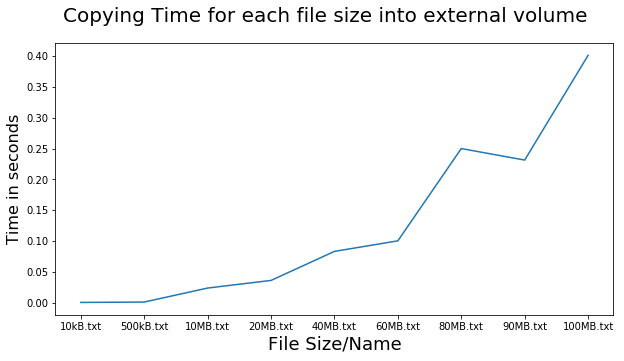

In [53]:
# Copy time chart
%pylab inline 
plt.figure(figsize=(10,5))
plt.suptitle('Copying Time for each file size into external volume', fontsize=20)
plt.xlabel('File Size/Name', fontsize=18)
plt.ylabel('Time in seconds', fontsize=16)
# will  make matplotlib/pylab available and plots will be displayed directly in the notebook, for example
x = range(0,len(x_axis))
plt.xticks(x, x_axis)
plt.plot(x,y_axis_copy)


Populating the interactive namespace from numpy and matplotlib


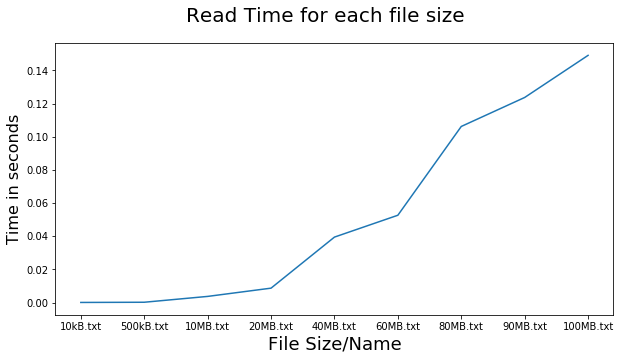

In [54]:
# Copy time chart
%pylab inline 
plt.figure(figsize=(10,5))
plt.suptitle('Read Time for each file size', fontsize=20)
plt.xlabel('File Size/Name', fontsize=18)
plt.ylabel('Time in seconds', fontsize=16)
# will  make matplotlib/pylab available and plots will be displayed directly in the notebook, for example
x = range(0,len(x_axis))
plt.xticks(x, x_axis)
plt.plot(x,y_axis_read)


Don't foget to terminate resources after your experiments. 

In [38]:
# Cleaning the external volume from all the copied files
import glob, os
for file in glob.glob("Volume1/*.txt"):
        os.remove(file)